# Trabajo Práctico - Contenido nutricional de la Canasta Básica

$Alumnos:$ Rostan Marcos

## Preprocesamiento de datos

### Consigna 1 - Leer los datos del archivo tabla_nutricional.csv. Completar las celdas faltantes con ceros. Poner todos los datos en la misma unidad.

In [2]:
import pandas as pd

In [3]:
# Leer el archivo CSV
file_path = 'C:/Users/Marcos/Desktop/TP 2 ALC/tabla_nutricional.csv'
data = pd.read_csv(file_path, delimiter=';')

# Reemplazar valores NaN con ceros
data.fillna(0, inplace=True)

# Definir las columnas que necesitamos convertir a gramos
columnas_a_convertir = ['Cantidad (gr/ml)', 'HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 'Na (mg)', 'Ca (mg)', 
                      'Fe (mg)', 'Azucares Libres (gr)', 'AGS (gr)', 'AGNI (gr)', 'AG p (gr)', 'Fibra (gr)']

# Convertir todas las unidades a gramos
# Para los valores en miligramos, dividimos por 1000 para convertir a gramos
for columna in columnas_a_convertir:
    if 'mg' in columna:
        data[columna] = data[columna] / 1000
        data.rename(columns={columna: columna.replace('(mg)', '(gr)')}, inplace=True)

# Guardar el DataFrame procesado a un nuevo archivo CSV
output_path = 'C:/Users/Marcos/Desktop/TP 2 ALC/tabla_nutricional_procesada.csv'
data.to_csv(output_path, index=False)

In [4]:
print("Cantidad de null que tiene ahora la tabla nutricional: ",data.isnull().sum().sum())

Cantidad de null que tiene ahora la tabla nutricional:  0


In [5]:
data.head()

,Alimento,Cantidad (gr/ml),HC (gr),Proteinas (gr),Grasas (gr),Na (gr),Ca (gr),Fe (gr),Azucares Libres (gr),AGS (gr),AGNI (gr),AG p (gr),Fibra (gr)
0,Leche fluida entera,270.00,12.42,8.37,7.83,0.15390,0.28350,0.000189,0.0,4.99,2.19,0.520,0.0
1,Leche entera en polvo,11.00,4.51,2.84,2.73,0.04444,0.09900,0.000060,0.0,1.62,0.77,0.060,0.0
2,Yogurt,19.00,2.45,0.51,0.49,0.00799,0.01767,0.000005,0.0,0.32,0.14,0.014,0.0
3,Queso crema,1.66,0.06,0.10,0.37,0.00123,0.00093,0.000000,0.0,0.36,0.11,0.010,0.0
4,Queso cuartirolo,3.66,0.06,0.77,0.80,0.02084,0.01654,0.000000,0.0,0.76,0.21,0.020,0.0


### Consigna 2 - Desarrollar una función que reciba como parámetro un DataFrame y que evalúe si las cantidades de los principales elementos de la dieta, proteínas. carbohidratos, grasas, sodio, fibra, frutas y verduras, cumple los márgenes de ingesta de la OMS. Está función debe devolver VERDADERO si los cumple. Verificar la Canasta Básica con esta función.

Función que evalua si se cumplen los márgenes de ingesta de la OMS. Devuelve una lista de cada nutriente con True o False si cumple o no cumple, y otra lista que devuelve el valor total de cada nutriente.

In [6]:
def evaluar_dieta(df):
    # Frutas y verduras
    frutas_y_verduras = ['Acelga', 'Zanahoria', 'Tomate', 'Lechuga', 'Cebolla', 'Zapallo', 'Manzana', 'Naranja', 
                         'Mandarina', 'pera', 'Banana', 'Papa', 'Batata']

    # Filtrar en el dataFrame original solo las frutas y verduras
    filtro_frutas_y_verduras = df[df['Alimento'].apply(lambda x: x in frutas_y_verduras)]

    # Obtener la cantidad total (gr/ml) de las frutas y verduras
    cantidad_gr_frutas_y_verduras = filtro_frutas_y_verduras['Cantidad (gr/ml)'].sum()
    
    # Nutrientes usados para calcular la energía total
    nutrientes = ['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)', 'Na (gr)', 'Ca (gr)', 'Fe (gr)', 
                  'Azucares Libres (gr)', 'Fibra (gr)']
    
    # Cada nutriente con su valor total
    total_valores_nutrientes = df[nutrientes].sum()
    total_valores_nutrientes['Frutas y verduras'] = cantidad_gr_frutas_y_verduras
    
    # Energía total
    energia_total = 0
    for nutriente in nutrientes: # Sumar el valor total de cada nutriente para asi obtener la energía total
        energia_total += total_valores_nutrientes[nutriente]
    
    # Márgenes de la OMS
    margenes = {
        'Grasas (gr)': (0.15*energia_total, 0.30*energia_total), # % Energía total
        'HC (gr)': (0.55*energia_total, 0.75*energia_total), # % Energía total
        'Proteinas (gr)': (0.10*energia_total, 0.15*energia_total), # % Energía total
        'Na (gr)': (0, 0.2),  # g/día
        'Frutas y verduras': (400, float('inf')),  # g/día
        'Fibra (gr)': (25, float('inf'))  # g/día
    }
    
    # Evaluamos los márgenes
    cumple_margenes = {}

    # Valores de los principales elementos de la dieta
    valores = {}
    
    # Verificamos cada margen
    for factor, (min_val, max_val) in margenes.items():
        if factor in total_valores_nutrientes.index:
            valor = total_valores_nutrientes[factor]
            valores[factor] = valor
            if (min_val <= valor <= max_val):
                cumple_margenes[factor] = True
            else:    
                cumple_margenes[factor] = False
    return cumple_margenes, valores


In [8]:
res_cumple_margenes , res_valores = evaluar_dieta(data)


In [9]:
for factor, margen in res_cumple_margenes.items():
    print(f"{factor} = {margen}")

Grasas (gr) = False
HC (gr) = True
Proteinas (gr) = False
Na (gr) = False
Frutas y verduras = True
Fibra (gr) = False


In [10]:
for factor, valor in res_valores.items():
    print(f"{factor} = {valor}")

Grasas (gr) = 76.911
HC (gr) = 410.235
Proteinas (gr) = 112.41299999999998
Na (gr) = 3.337714
Frutas y verduras = 650.0
Fibra (gr) = 21.26


* Esto quiere decir que la mayoría de los nutrientes de la dieta no cumplen con los márgenes de ingesta de la OMS. Tanto como las grasas, las proteínas, el sodio y la Fibra por gramo, no cumplen con los márgenes. Mientras que la cantidad de gramos de frutas y verduras, y los carbohidratos si cumplen.  

* Analizando uno por uno los nutrientes, se podría decir que:

$Grasas:$ su valor es de 11% de la energía total cuando en verdad debería estar entre 15-30%

$HC:$ su valor es de 60% de la energía total y el rango de la OMS es de 55-75%

$Proteínas:$ su valor es de 16,5% de la energía total cuando en verdad debería estar entre 10-15%

$Sodio:$ su valor es de 3,34 g/día cuando en verdad debería estar en 0,2 gr/día

$\text {Frutas y verduras}:$ su valor es 650 g/día y el rango OMS es >=400g/día

$Fibra:$ su valor es de 21,6 g/día cuando en verdad debería estar en >25 g/día

## Análisis en Componentes Principales

### Consigna 3 - Realizar un Análisis en Componentes Principales (ACP), tomando el valor nutricional de cada alimento por gramo. Graficar cada alimento como un punto en ejes coordenados del nuevo espacio creado por los autovectores generadores del ACP. En este gráfico, analizar los clusteres que quedan planteados por la proyección.

Importar librerías utilizadas.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Función que recibe un dataFrame con las columnas de las variables nutricionales y sus valores por alimento, y devuelve los autovalores, autovectores, los datos centralizados y la media ordenado por los autovalores de mayor a menor.

In [12]:
def calculoACP(data):
    d, n = data.shape

    # Calcular la media de cada fila (dimensión)
    m = np.mean(data, axis=1)
    
    # Centrar los datos estandarizados restando la media
    X = data - m.reshape((d, 1))

    # Calcular la matriz de covarianza
    Mcov = np.dot(X, X.T) / n

    # Calcular los autovalores y autovectores
    D, V = np.linalg.eigh(Mcov)

    # Ordenar los autovalores (y sus correspondientes autovectores) de mayor a menor
    idx = np.argsort(-D)
    D = D[idx]
    V = V[:, idx]

    return D, V, X, m

Cálculo de ACP y su proyección.

In [13]:
# Extraer los datos nutricionales (excluyendo la primera columna 'Alimento')
data_nutrientes = data.iloc[:, 2:].to_numpy().T

# Obtener las cantidades
cantidades = data['Cantidad (gr/ml)'].to_numpy()

# Dividir cada valor nutricional por la cantidad correspondiente
data_nutrientes_por_cantidad = data_nutrientes / cantidades

# Obtener los nombres de los alimentos
nombres_alimentos = data['Alimento'].tolist()

# Realizar el ACP
D, V, X, m = calculoACP(data_nutrientes_por_cantidad)

# Proyectar los datos en el nuevo espacio creado por los primeros dos autovectores
proyeccion_nutrientes = np.dot(V.T, X)



#### Gráfico del Análisis en Componentes Principales tomando el valor nutricional de cada alimento por gramo en 2D.

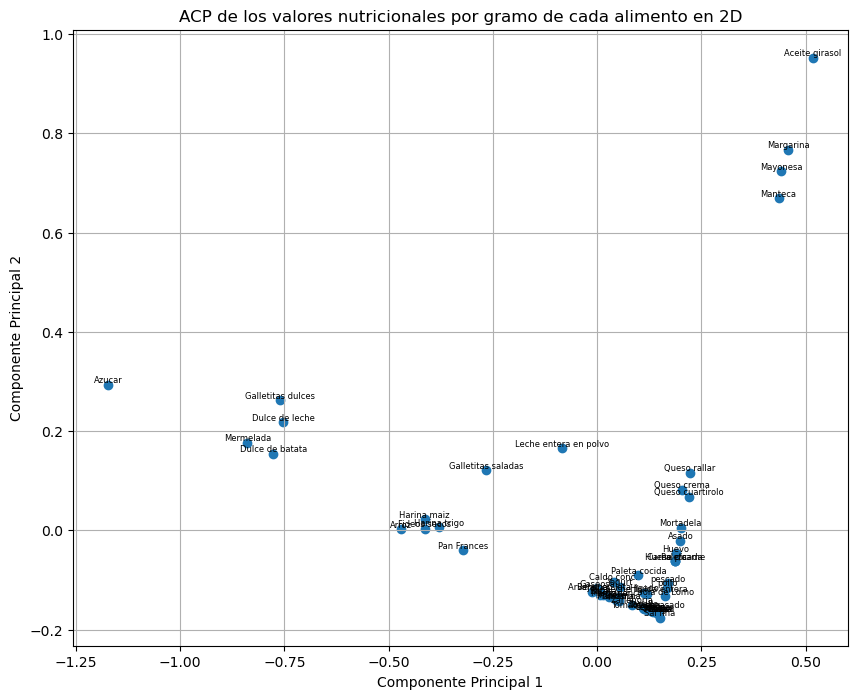

In [14]:
# Graficar los alimentos en el nuevo espacio 2D
plt.figure(figsize=(10, 8))
plt.scatter(proyeccion_nutrientes[0, :], proyeccion_nutrientes[1, :])

# Agregar etiquetas de los nombres de los alimentos
for i, nombre in enumerate(nombres_alimentos):
    plt.text(proyeccion_nutrientes[0, i], proyeccion_nutrientes[1, i], nombre, fontsize=6, ha='center', va='bottom')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('ACP de los valores nutricionales por gramo de cada alimento en 2D')
plt.grid(True)
plt.show()

Utilizamos K-Means para el agrupamiento

In [15]:
from sklearn.cluster import KMeans

C:\Users\Marcos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Marcos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


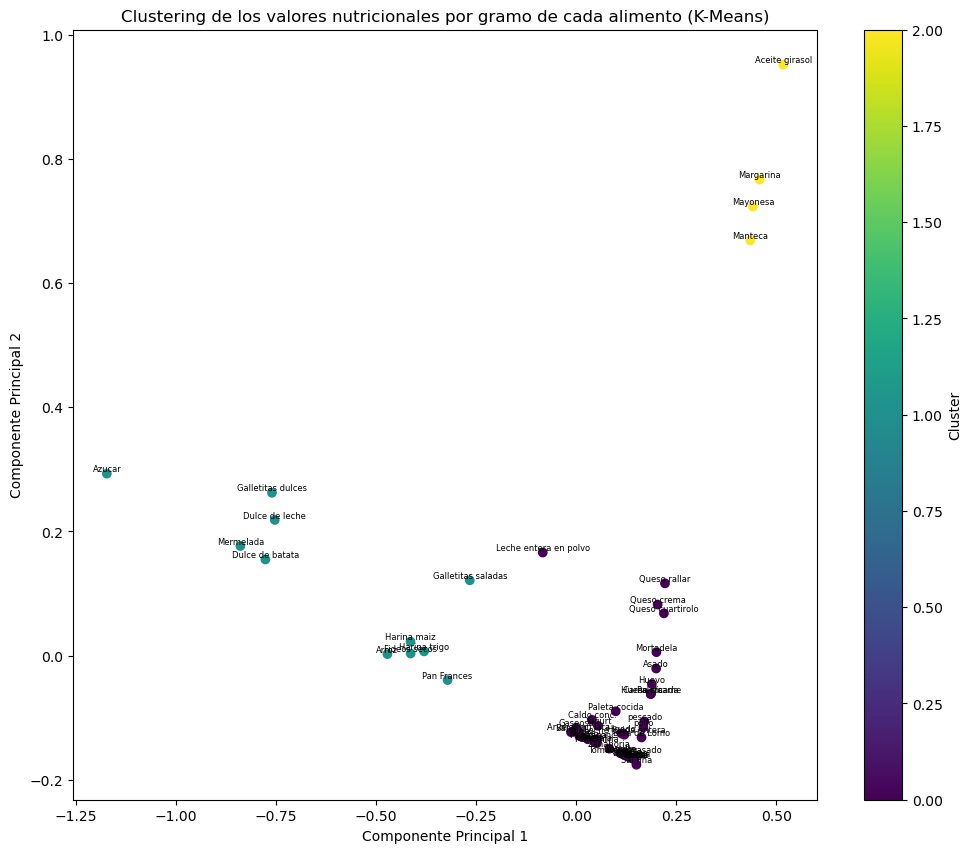

In [16]:
# Aplicar K-Means en los datos proyectados
kmeans = KMeans(n_clusters=3, random_state=0).fit(proyeccion_nutrientes.T)
labels = kmeans.labels_

#Graficar los clusters
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(proyeccion_nutrientes[0, :], proyeccion_nutrientes[1, :], c=labels, cmap='viridis')

# Agregar etiquetas de los nombres de los alimentos
for i, nombre in enumerate(nombres_alimentos):
    ax.text(proyeccion_nutrientes[0, i], proyeccion_nutrientes[1, i], nombre, fontsize=6, ha='center', va='bottom')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_title('Clustering de los valores nutricionales por gramo de cada alimento (K-Means)')

# Añadir una barra de colores para los clusters
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

plt.show()

De los gráficos se puede deducir 3 clusters, ya que probando con 4 clusters en K-Means se solapaban grupos. 

A continuación se mostrará la contribuciones de los nutrientes a cada componente principal (2D)

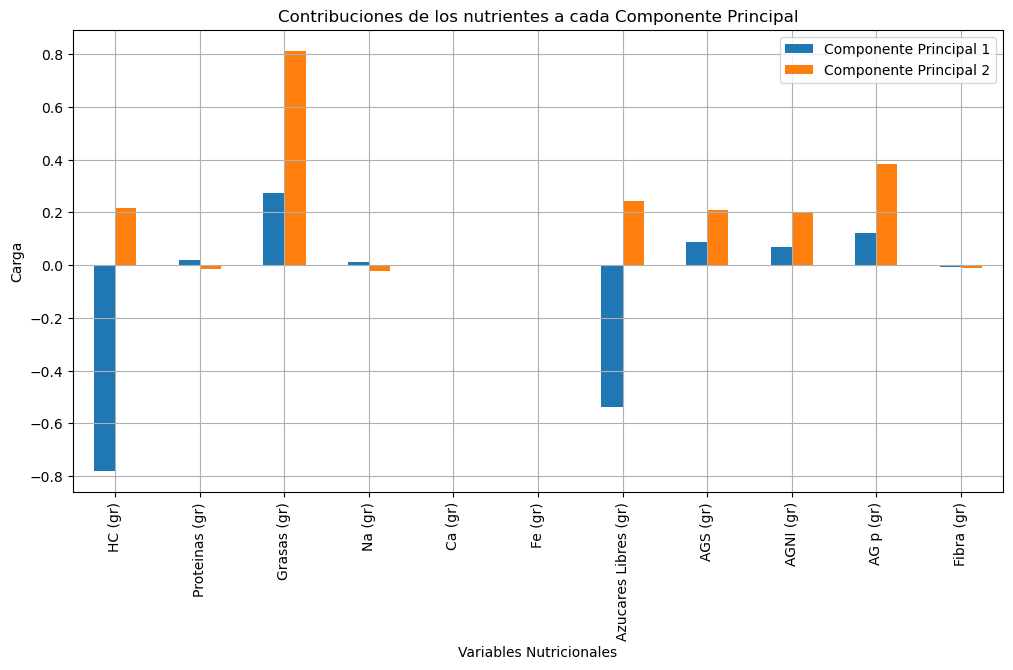

In [17]:
# Interpretación de los ejes (Componentes Principales)
nutrientes = data.columns[2:]

# Crear un DataFrame para visualizar mejor las contribuciones
df_nutrientes = pd.DataFrame(V[:, :2], columns=['Componente Principal 1', 'Componente Principal 2'], index=nutrientes)

# Visualización de las contribuciones de las variables originales a cada componente principal
df_nutrientes.plot(kind='bar', figsize=(12, 6))
plt.title('Contribuciones de los nutrientes a cada Componente Principal')
plt.ylabel('Carga')
plt.xlabel('Variables Nutricionales')
plt.grid(True)
plt.show()

Se puede observar que las grasas y los carbohidratos son las variables nutricionales que más peso tienen en las componentes principales. Siendo grasas la que más aporta a la componente principal 2 y carbohidratos a la componente principal 1. También se puede decir que hay variables nutricionales que su aporte es casi nulo, como el del sodio.

En conclusión, tomando en cuenta todos los gráficos hechos, al utilizar 2 componentes principales se puede observar como se agrupan los alimentos según sus valores nutricionales, en mayor parte grasas y carbohidratos. Por ejemplo, hay un cluster que está compuesto por manteca, margarina, aceite girasol y mayonesa, siendo el motivo del agrupamiento la gran cantidad de grasas que tienen esos 4 alimentos. Y otro como el de azúzar, mermelada y los dulces que tienen valores altos de "Azucares Libres" comparado al resto de los alimentos.

$Comentario:$ Los lácteos como algunas leches y quesos, son díficil de clasificar ya que tienen valores altos tanto de proteína como de grasa.

#### Gráfico del Análisis en Componentes Principales tomando el valor nutricional de cada alimento por gramo en 3D.

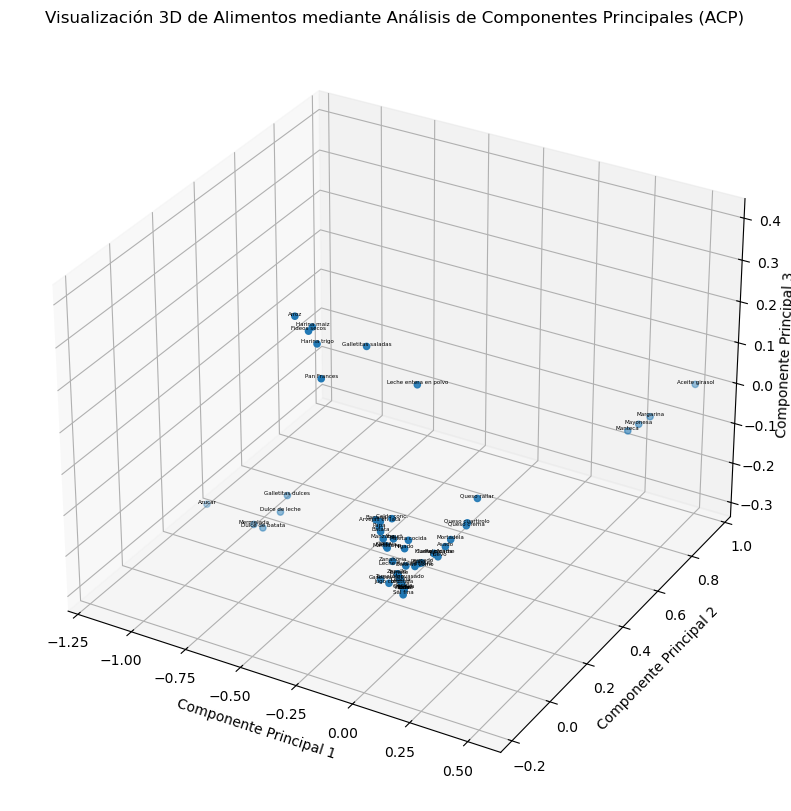

In [18]:
# Proyectar los datos en el nuevo espacio creado por los primeros tres autovectores
proyeccion_nutrientes_3d = np.dot(V.T, X)[:3, :]

# Graficar los alimentos en el nuevo espacio 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proyeccion_nutrientes_3d[0, :], proyeccion_nutrientes_3d[1, :], proyeccion_nutrientes_3d[2, :])

# Agregar etiquetas de los nombres de los alimentos
for i, nombre in enumerate(nombres_alimentos):
    ax.text(proyeccion_nutrientes_3d[0, i], proyeccion_nutrientes_3d[1, i], proyeccion_nutrientes_3d[2, i], nombre, fontsize=4, ha='center', va='bottom')


ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3', labelpad=0.5)
ax.set_title('Visualización 3D de Alimentos mediante Análisis de Componentes Principales (ACP)')

plt.show()

Utilizamos K-Means para el agrupamiento

In [19]:
# Aplicar K-Means en los datos proyectados
kmeans = KMeans(n_clusters=3, random_state=0).fit(proyeccion_nutrientes_3d.T)
labels = kmeans.labels_

C:\Users\Marcos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Marcos\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


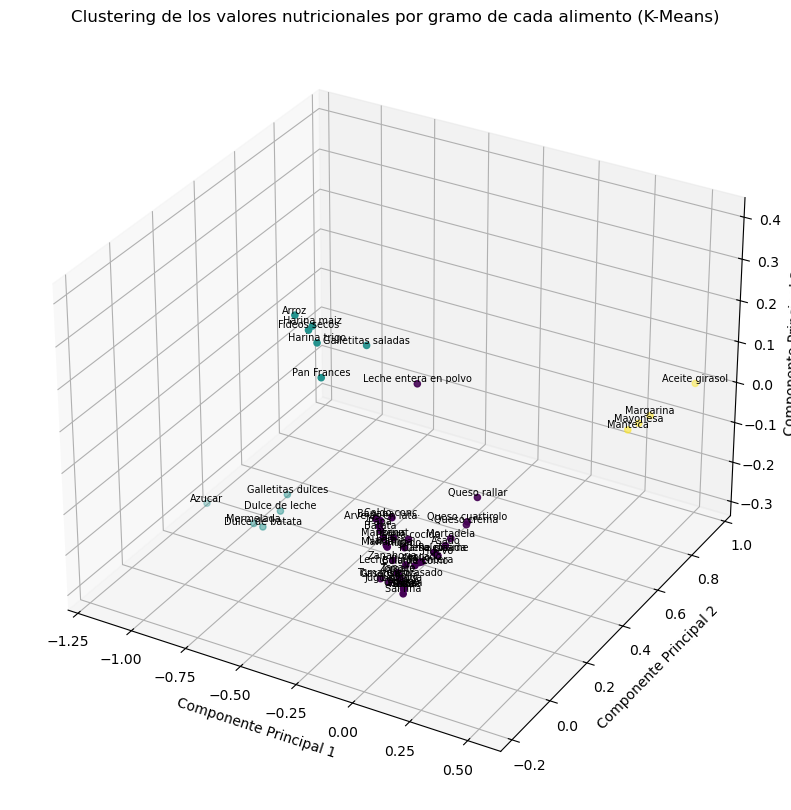

In [20]:
# Graficar los clusters en un gráfico 3D separado
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(proyeccion_nutrientes[0, :], proyeccion_nutrientes[1, :], proyeccion_nutrientes[2, :], c=labels, cmap='viridis')

# Agregar etiquetas de los nombres de los alimentos
for i, nombre in enumerate(nombres_alimentos):
    ax.text(proyeccion_nutrientes[0, i], proyeccion_nutrientes[1, i], proyeccion_nutrientes[2, i], nombre, fontsize=7, ha='center', va='bottom')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Clustering de los valores nutricionales por gramo de cada alimento (K-Means)')

plt.show()

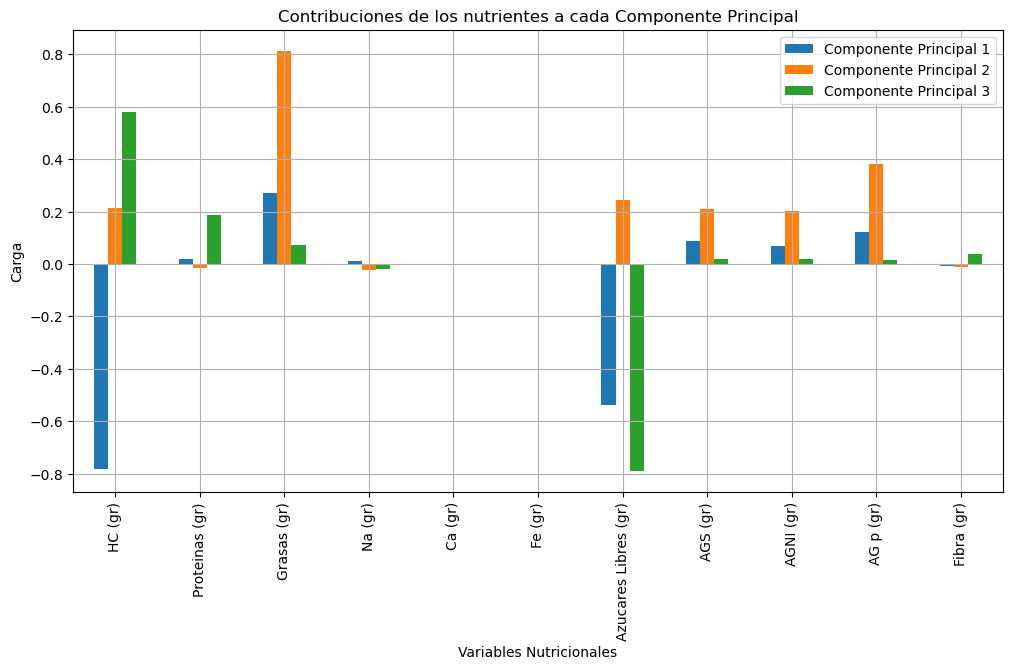

In [21]:
# Crear un DataFrame para visualizar mejor las contribuciones
df_nutrientes = pd.DataFrame(V[:, :3], columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'], index=nutrientes)

# Visualización de las contribuciones de las variables originales a cada componente principal
df_nutrientes.plot(kind='bar', figsize=(12, 6))
plt.title('Contribuciones de los nutrientes a cada Componente Principal')
plt.ylabel('Carga')
plt.xlabel('Variables Nutricionales')
plt.grid(True)
plt.show()

Además del gran aporte de las grasas y los carbohidratos sobre las componentes principales 1 y 2, ahora se sumaron las Azucares libres y proteínas. Los carbohidratos junto con azúcares libres, tienen mucho peso sobre la componente principal 3.

En conclusión, siguen siendo los mismos clusters, pero variando levemente algunos alimentos en sus posiciones. Es por eso que proponemos usar dos componentes principales, ya que la componente principal 3 no suma información importante.

### Consigna 4 - Proyectar los alimentos de la tabla de Consumidores libres en el espacio de generadores del ACP. 

#### Limpieza de datos

Como los alimentos de en las tablas no tienen el mismo nombre, vamos a cambiarlos a mano para poder realizar el ACP.

Cambios hechos:

ACEITE COCINERO GIRASOL $\rightarrow$ Aceite girasol 

ACELGA PAQUETE $\rightarrow$ Acelga

ARROZ GRANO FINO $\rightarrow$ Arroz 

ASADO $\rightarrow$ Asado 

AZUCAR LEDESMA $\rightarrow$ Azucar 

BERENJAS $\rightarrow$ $NULL$ 

BOLA DE LOMO $\rightarrow$ Bola de Lomo 

CARNE PICADA COMUN $\rightarrow$ Carne picada 

CEBOLLA $\rightarrow$ Cebolla 

FIDEOS GUISEROS $\rightarrow$ Fideos secos 

HARINA DE TRIGO $\rightarrow$ Harina trigo

HUEVOS COLOR DOCENA $\rightarrow$ Huevo

LECHE c/VIT. FOR $\rightarrow$ Leche entera en polvo

MANZANA $\rightarrow$ Manzana

NARANJA $\rightarrow$ Naranja

PALETA $\rightarrow$ Paleta cocida

PAN FRESCO $\rightarrow$ Pan Frances

PAPA NEGRA $\rightarrow$ Papa

TOMATE PERITA $\rightarrow$ Tomate

YERBA YARAGUI $\rightarrow$ Yerba

ZANAHORIAS $\rightarrow$ Zanahoria

In [22]:
# Alimentos de la tabla consumidores libres
alimentos = ['Aceite girasol', 'Acelga', 'Arroz', 'Asado', 'Azucar', 'Bola de Lomo', 'Carne picada', 'Cebolla', 'Fideos secos', 'Harina trigo', 'Huevo',
            'Leche entera en polvo', 'Manzana', 'Naranja', 'Paleta cocida', 'Pan Frances', 'Papa', 'Tomate', 'Yerba', 'Zanahoria']

# Filtrar en tabla nutricional los alimentos que aparecen en tabla consumidores libres
df_filtrado_nutricional = data[data['Alimento'].apply(lambda x: x in alimentos)]

Cálculo del ACP y su proyección

In [23]:
# Extrar los valores nutricionales para el ACP
valores_nutricionales_filtrado = df_filtrado_nutricional.iloc[:, 2:].to_numpy().T

# Obtener las cantidades
cantidades_consumidores = df_filtrado_nutricional['Cantidad (gr/ml)'].to_numpy()

# Dividir cada valor nutricional por la cantidad correspondiente
data_consumidores = valores_nutricionales_filtrado / cantidades_consumidores

# Realizar el ACP
D, V, X, m = calculoACP(data_consumidores)

# Proyectar los datos en el nuevo espacio creado por los primeros dos autovectores
proyeccion_consumidores_libre = np.dot(V.T, X)


#### Gráfico del Análisis en Componentes Principales tomando el valor nutricional de cada alimento por gramo para los productos de la tabla de consumidores libres en 2D.

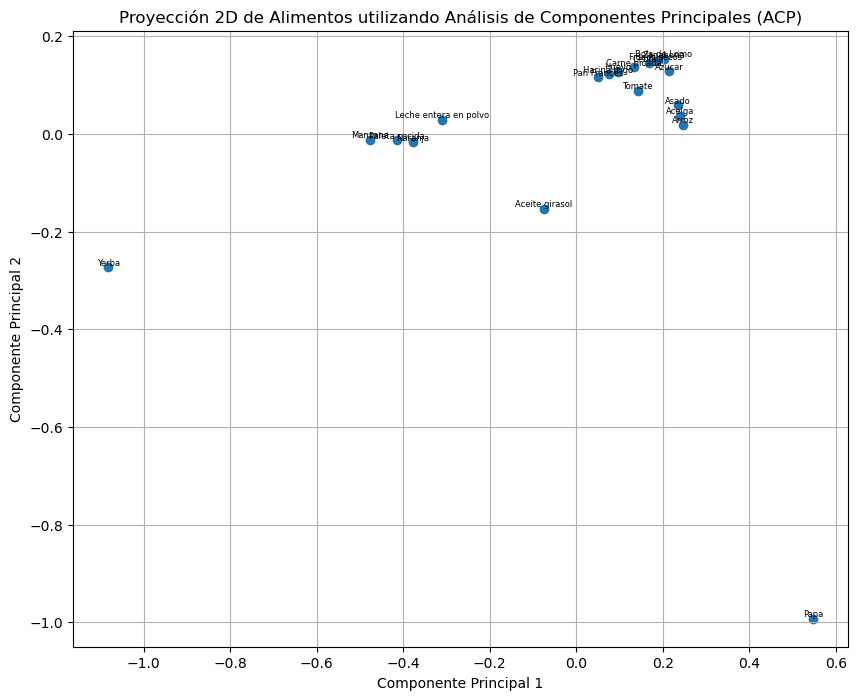

In [24]:
# Graficar los alimentos en el nuevo espacio 2D
plt.figure(figsize=(10, 8))
plt.scatter(proyeccion_consumidores_libre[0, :], proyeccion_consumidores_libre[1, :])

# Agregar etiquetas de los nombres de los alimentos
for i, nombre in enumerate(alimentos):
    plt.text(proyeccion_consumidores_libre[0, i], proyeccion_consumidores_libre[1, i], nombre, fontsize=6, ha='center', va='bottom')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Proyección 2D de Alimentos utilizando Análisis de Componentes Principales (ACP)')
plt.grid(True)
plt.show()



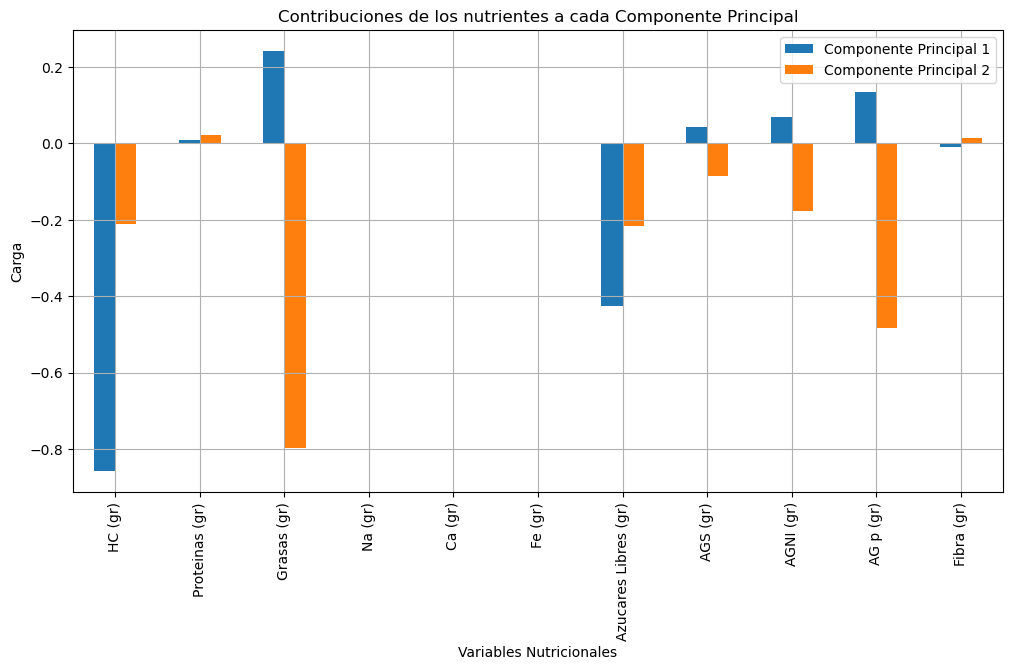

In [25]:
# Interpretación de los ejes (Componentes Principales)
nutrientes_2d = df_filtrado_nutricional.columns[2:]

# Crear un DataFrame para visualizar mejor las contribuciones
df_nutrientes = pd.DataFrame(V[:, :2], columns=['Componente Principal 1', 'Componente Principal 2'], index=nutrientes)

# Visualización de las contribuciones de las variables originales a cada componente principal
df_nutrientes.plot(kind='bar', figsize=(12, 6))
plt.title('Contribuciones de los nutrientes a cada Componente Principal')
plt.ylabel('Carga')
plt.xlabel('Variables Nutricionales')
plt.grid(True)
plt.show()

Se puede observar a ojo que hay 3 clusters, en donde hay uno que esta conformado por un alimento único que es la yerba. La yerba tiene un perfil nutricional único, significativamente diferente al de la mayoría de los otros alimentos. El aporte de la componente principal 1 tiene a los carbohidratos como la variable nutricional más influyente, mientras que la componente principal 2 las grasas son las más "pesadas".

$Comentario:$ Son casi idénticas las contribuciones de los nutrientes a cada componente principal a las calculadas en la consigna (3).

#### Gráfico del Análisis en Componentes Principales tomando el valor nutricional de cada alimento por gramo para los productos de la tabla de consumidores libres en 3D.

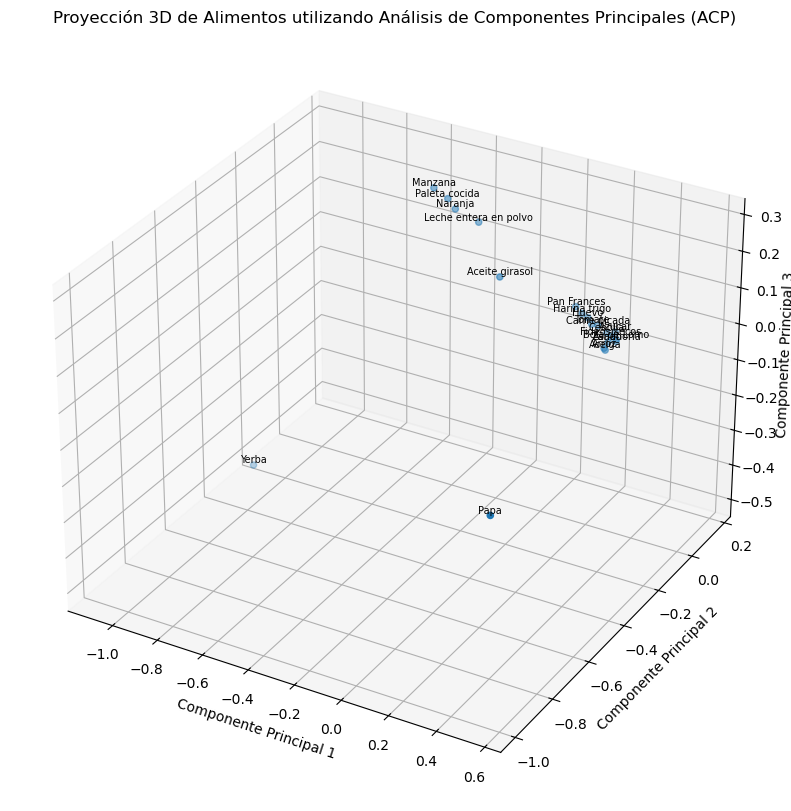

In [26]:
# Graficar los alimentos en el nuevo espacio 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(proyeccion_consumidores_libre[0, :], proyeccion_consumidores_libre[1, :], proyeccion_consumidores_libre[2, :])

# Agregar etiquetas de los nombres de los alimentos
for i, nombre in enumerate(alimentos):
    ax.text(proyeccion_consumidores_libre[0, i], proyeccion_consumidores_libre[1, i], proyeccion_consumidores_libre[2, i], nombre, fontsize=7, ha='center', va='bottom')


ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3', labelpad=0.5)
ax.set_title('Proyección 3D de Alimentos utilizando Análisis de Componentes Principales (ACP)')

plt.show()

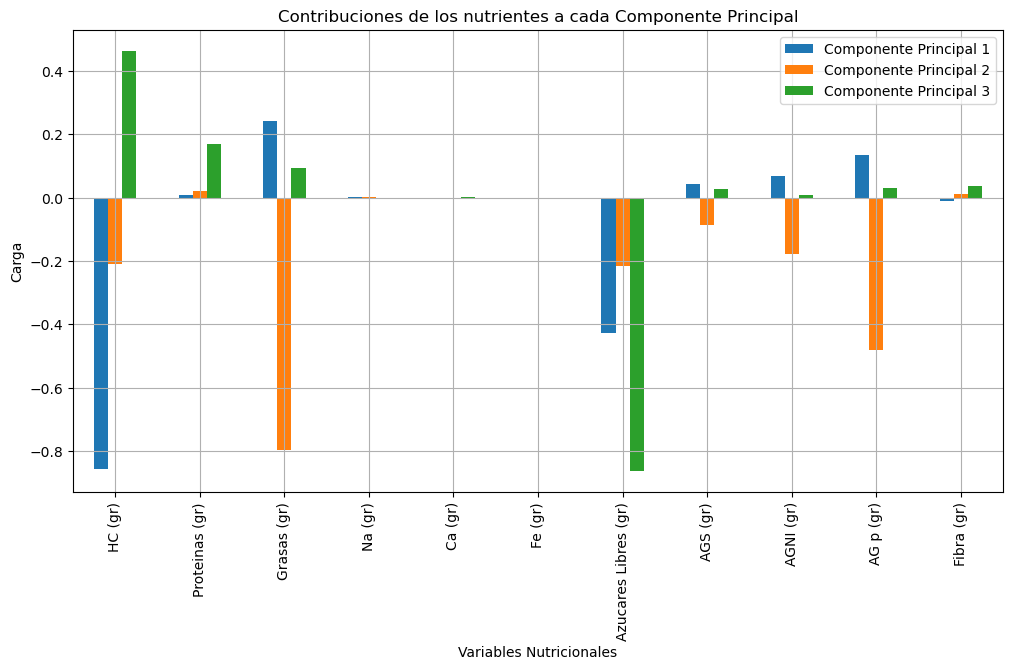

In [27]:
# Crear un DataFrame para visualizar mejor las contribuciones
df_nutrientes = pd.DataFrame(V[:, :3], columns=['Componente Principal 1', 'Componente Principal 2', 'Componente Principal 3'], index=nutrientes)

# Visualización de las contribuciones de las variables originales a cada componente principal
df_nutrientes.plot(kind='bar', figsize=(12, 6))
plt.title('Contribuciones de los nutrientes a cada Componente Principal')
plt.ylabel('Carga')
plt.xlabel('Variables Nutricionales')
plt.grid(True)
plt.show()

Ahora en 3D se podrían tomar 4 cluters, en donde hay 2 con alimentos únicos y 2 que contienen a los demás. Las primeras dos componentes principales se mantuvieron en sus contribuciones de variables nutricionales, mientras que la tercer componente principal se ve altamente dependiente de las variables azucares libres y carbohidratos. 

En este caso también es conveniente utilizar 2 componentes principales en vez de 3 ya que no presentan grandes cambios en la clasificación.

## Mínimos Cuadrados

### Consigna 5 - Aplicar Mínimos Cuadrados sobre los precios de cada nutriente (HC, Proteínas y grasas) para evaluar el aumento en estos 4 meses. Graficar cada punto de cada alimento y la recta obtenida por Mínimos Cuadrados. Hacer una tabla de los aumentos.

Resolvemos el problema mediante las ecuaciones normales

$$
A^tA c = A^ty
$$

para una matriz $A$ apropiada.

**Pasos a seguir:** (para cada gráfico correspondiente)
1. Obtener la matriz A.
2. Resolver por mínimos cuadrados utilizando la función de escalonamiento utilizada en el laboratorio de ALC.
3. Graficar la nube de puntos y la función encontrada.

Nuevamente tuvimos que utilizar la tabla filtro del punto 4, ya que los productos de la tabla consumidores libre no tenían el mismo nombre que los alimentos de la tabla nutricional.

Vamos a normalizar ambas tablas (tabla filtro y consumidores libres), para que queden las dos por gramo.

**Función que aplica Mínimos Cuadrados**

Función que recibe un dataframe de 4 columnas y retorna los coeficientes de la recta $y = c_{0}x + c_{1}$

In [28]:
def minimosCuadrados(df):
    # Precios por mes
    diciembre = df['Dic.'].values
    enero = df['Enero'].values
    febrero = df['Feb.'].values
    marzo = df['Marzo'].values

    # Cantidad de muestras por mes
    cantidad_muestras = len(enero)

    # Crear la segunda columna de A
    segunda_columna_A = np.concatenate([
        np.full(cantidad_muestras, 1),   # Todos los elementos son 1 (para diciembre)
        np.full(cantidad_muestras, 2),   # Todos los elementos son 2 (para enero)
        np.full(cantidad_muestras, 3),   # Todos los elementos son 3 (para febrero)
        np.full(cantidad_muestras, 4)    # Todos los elementos son 4 (para marzo)
    ])

    # Crear matriz de diseño A
    A = np.vstack([
        np.ones(cantidad_muestras * 4),  # Primera columna: todos los elementos son 1
        segunda_columna_A               # Segunda columna: valores según el mes
    ]).T

    # Vector de precios y
    y = np.concatenate((diciembre,enero,febrero,marzo))

    # Cálculo de A^t.A y A^t.y
    A_traspuesta = A.T # A^t
    A_traspuesta_A = np.dot(A_traspuesta, A) # A^t.A
    A_traspuesta_y = np.dot(A_traspuesta, y) # A^t.y
    
    # Cálculo de los coeficientes c en el sistema (A^t.A).c = (A^t.y)
    coeficientes_c = np.linalg.solve(A_traspuesta_A, A_traspuesta_y)

    return coeficientes_c

**tabla filtro**

In [29]:
# Seleccionar las columnas de interés
columnas_interes = ['HC (gr)', 'Proteinas (gr)', 'Grasas (gr)']
df_filtrado = df_filtrado_nutricional[columnas_interes].copy()

# Normalizar las columnas HC, Proteinas y Grasas dividiendo por cantidades_consumidores
df_final_filtrado = df_filtrado.div(cantidades_consumidores, axis=0)

# Agregar la columna Alimento
df_final_filtrado['Alimento'] = df_filtrado_nutricional['Alimento']


**tabla consumidores**

In [30]:
# Leer archivo consumidores libres
tabla_consumidores_libres = pd.read_csv('C:/Users/Marcos/Desktop/TP 2 ALC/consumidores_libres.csv', delimiter = ';') 

# Cambiar las fechas por nombre del mes
tabla_consumidores_libres.columns = ['PRODUCTOS', 'Cantidad', 'Dic.', 'Enero', 'Feb.', 'Marzo', 'Abril']

# Normalizar dividiendo por la cantidad a los precios por mes
cantidades_precios = tabla_consumidores_libres['Cantidad']

tabla_consumidores_libres['Dic.'] = tabla_consumidores_libres['Dic.'].div(cantidades_precios, axis = 0)
tabla_consumidores_libres['Enero'] = tabla_consumidores_libres['Enero'].div(cantidades_precios, axis = 0) 
tabla_consumidores_libres['Feb.'] = tabla_consumidores_libres['Feb.'].div(cantidades_precios, axis = 0) 
tabla_consumidores_libres['Marzo'] = tabla_consumidores_libres['Marzo'].div(cantidades_precios, axis = 0) 
tabla_consumidores_libres['Abril'] = tabla_consumidores_libres['Abril'].div(cantidades_precios, axis = 0) 

# Eliminar las berenjenas (no están en la tabla nutricional)
# Identificar el índice de la fila que contiene 'BERENJENAS' en la primera columna
indice_a_eliminar = tabla_consumidores_libres[tabla_consumidores_libres['PRODUCTOS'] == 'BERENJENAS'].index

# Eliminar la fila utilizando el índice obtenido
tabla_consumidores_libres = tabla_consumidores_libres.drop(indice_a_eliminar)

# Normalizar nombres de alimentos
tabla_consumidores_libres['Alimento'] = ['Aceite girasol', 'Arroz', 'Azucar', 'Fideos secos', 'Harina trigo', 'Huevo', 'Pan Frances', 'Leche entera en polvo', 'Yerba', 'Zanahoria', 'Tomate', 'Cebolla', 'Papa', 'Acelga', 'Naranja', 'Manzana', 'Bola de Lomo', 'Asado', 'Paleta cocida', 'Carne picada']

# Eliminar columna PRODUCTOS y Cantidad
tabla_consumidores_libres = tabla_consumidores_libres.drop(columns = ['PRODUCTOS', 'Cantidad'])


**tabla Resultante (consumidores INNER JOIN filtro)**

In [31]:
# Realizar el inner join usando merge
tabla_resultante = pd.merge(tabla_consumidores_libres, df_final_filtrado, on='Alimento', how='inner')
tabla_resultante

,Dic.,Enero,Feb.,Marzo,Abril,Alimento,HC (gr),Proteinas (gr),Grasas (gr)
0,1.666667,2.066667,2.300000,2.400000,2.466667,Aceite girasol,0.000000,0.000000,1.000000
1,1.650000,2.300000,2.800000,3.100000,3.550000,Arroz,0.791944,0.068889,0.000000
2,1.990000,2.050000,2.050000,2.100000,2.100000,Azucar,1.000000,0.000000,0.000000
3,3.200000,3.980000,4.300000,4.400000,4.580000,Fideos secos,0.725893,0.127679,0.015714
4,0.950000,1.250000,1.350000,1.500000,1.690000,Harina trigo,0.687111,0.102889,0.026889
5,3.055556,3.611111,4.166667,4.722222,5.277778,Huevo,0.000000,0.120000,0.118125
6,1.650000,2.100000,2.200000,2.300000,2.300000,Pan Frances,0.600000,0.100000,0.000000
7,1.100000,1.210000,1.620000,1.890000,1.990000,Leche entera en polvo,0.410000,0.258182,0.248182
8,2.800000,3.700000,4.600000,4.950000,5.500000,Yerba,0.000000,0.000000,0.000000
9,0.820000,0.990000,1.100000,1.100000,1.100000,Zanahoria,0.080000,0.010741,0.000000


#### Mínimos Cuadrados sobre los precios de HC (meses: Diciembre, Enero, Febrero, Marzo)

In [32]:
# Filtrar la tabla resultante teniendo solamente los precios, el alimento y la cantidad de HC por gramo de alimento
tabla_HC = tabla_resultante.drop(columns = ['Proteinas (gr)', 'Grasas (gr)'])

# Eliminar los alimentos que no tienen HC
# Identificar el índice de la fila que contiene 0 como valor de HC
indice_A_eliminar = tabla_HC[tabla_HC['HC (gr)'] == 0].index

# Eliminar la fila utilizando el índice obtenido
tabla_HC = tabla_HC.drop(indice_A_eliminar)

# Eliminar el mes Abril
tabla_HC = tabla_HC.drop(columns = 'Abril')

# Multiplicar cada fila por su valor 
# Lista de valores de HC
valores_HC = tabla_HC['HC (gr)']

# Multiplicar a cada precio por mes el factor "X = 1 / (cantidad de gr del nutriente cada 1 gr de alimento)", (Esto sale de hacer una regla de 3 simple)
tabla_HC['Dic.'] = tabla_HC['Dic.'] * (1/valores_HC)
tabla_HC['Enero'] = tabla_HC['Enero'] * (1/valores_HC)
tabla_HC['Feb.'] = tabla_HC['Feb.'] * (1/valores_HC)
tabla_HC['Marzo'] = tabla_HC['Marzo'] * (1/valores_HC)

# Eliminar columna de HC (porque el valor es siempre 1 gr)
tabla_HC = tabla_HC.drop(columns = "HC (gr)")

tabla_HC

,Dic.,Enero,Feb.,Marzo,Alimento
1,2.083479,2.904244,3.535602,3.914416,Arroz
2,1.990000,2.050000,2.050000,2.100000,Azucar
3,4.408364,5.482903,5.923739,6.061501,Fideos secos
4,1.382600,1.819211,1.964748,2.183053,Harina trigo
6,2.750000,3.500000,3.666667,3.833333,Pan Frances
7,2.682927,2.951220,3.951220,4.609756,Leche entera en polvo
9,10.250000,12.375000,13.750000,13.750000,Zanahoria
10,29.257951,26.819788,29.257951,56.077739,Tomate
11,22.680412,31.752577,44.907216,52.164948,Cebolla
12,4.802615,5.028621,5.650136,5.593634,Papa


**Aplicar Mínimos Cuadrados HC**

In [33]:
# coeficientes c del sistema (A^t.A).c = (A^t.y)
c_HC = minimosCuadrados(tabla_HC)

# valores "x" para la recta y = m.x + b
x_HC = np.concatenate([
        np.full(len(tabla_HC['Dic.']), 1),   # Todos los elementos son 1 (para diciembre)
        np.full(len(tabla_HC['Enero']), 2),   # Todos los elementos son 2 (para enero)
        np.full(len(tabla_HC['Feb.']), 3),   # Todos los elementos son 3 (para febrero)
        np.full(len(tabla_HC['Marzo']), 4)    # Todos los elementos son 4 (para marzo)
])

# recta generada por mínimos cuadrados y = m.x + b
b_HC = c_HC[0] # ordenada al origen
m_HC = c_HC[1] # pendiente
y_HC = m_HC * x_HC + b_HC

**Gráfico HC**

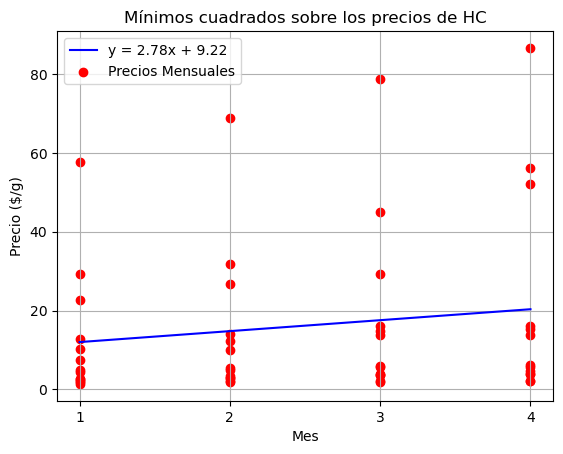

In [34]:
# lista de precios de todos los meses para graficar en el scatter
y_total_HC = np.concatenate((tabla_HC['Dic.'].values, tabla_HC['Enero'].values, tabla_HC['Feb.'].values, tabla_HC['Marzo'].values))

# Graficar la recta HC
plt.plot(x_HC, y_HC, label=f'y = {m_HC:.2f}x + {b_HC:.2f}', color='blue')

# Graficar el scatter
plt.scatter(x_HC, y_total_HC, color='red', label='Precios Mensuales')

plt.xlabel('Mes')
plt.ylabel('Precio ($/g)')
plt.title('Mínimos cuadrados sobre los precios de HC')
plt.xticks([1,2,3,4])

plt.legend()

plt.grid(True)
plt.show()

#### Mínimos Cuadrados sobre los precios de Proteínas (meses: Diciembre, Enero, Febrero, Marzo)

In [35]:
# Filtrar la tabla resultante teniendo solamente los precios, el alimento y la cantidad de Proteínas por gramo de alimento
tabla_PRO = tabla_resultante.drop(columns = ['HC (gr)', 'Grasas (gr)'])

# Eliminar los alimentos que no tienen Proteína
# Identificar el índice de la fila que contiene 0 como valor de Proteína
indice_A_eliminar = tabla_PRO[tabla_PRO['Proteinas (gr)'] == 0].index

# Eliminar la fila utilizando el índice obtenido
tabla_PRO = tabla_PRO.drop(indice_A_eliminar)

# Eliminar el mes Abril
tabla_PRO = tabla_PRO.drop(columns = 'Abril')

# Multiplicar cada fila por su valor 
# Lista de valores de Proteina
valores_PRO = tabla_PRO['Proteinas (gr)']

# Multiplicar a cada precio por mes el factor "X = 1 / (cantidad de gr del nutriente cada 1 gr de alimento)", (Esto sale de hacer una regla de 3 simple)
tabla_PRO['Dic.'] = tabla_PRO['Dic.'] * (1/valores_PRO)
tabla_PRO['Enero'] = tabla_PRO['Enero'] * (1/valores_PRO)
tabla_PRO['Feb.'] = tabla_PRO['Feb.'] * (1/valores_PRO)
tabla_PRO['Marzo'] = tabla_PRO['Marzo'] * (1/valores_PRO)

# Eliminar columna de proteinas (porque el valor es siempre 1 gr)
tabla_PRO = tabla_PRO.drop(columns = "Proteinas (gr)")

tabla_PRO

,Dic.,Enero,Feb.,Marzo,Alimento
1,23.951613,33.387097,40.645161,45.000000,Arroz
3,25.062937,31.172028,33.678322,34.461538,Fideos secos
4,9.233261,12.149028,13.120950,14.578834,Harina trigo
5,25.462963,30.092593,34.722222,39.351852,Huevo
6,16.500000,21.000000,22.000000,23.000000,Pan Frances
7,4.260563,4.686620,6.274648,7.320423,Leche entera en polvo
9,76.344828,92.172414,102.413793,102.413793,Zanahoria
10,120.000000,110.000000,120.000000,230.000000,Tomate
11,62.857143,88.000000,124.457143,144.571429,Cebolla
12,31.496764,32.978964,37.055016,36.684466,Papa


**Aplicar Mínimos Cuadrados Proteínas**

In [36]:
# coeficientes c del sistema (A^t.A).c = (A^t.y)
c_PRO = minimosCuadrados(tabla_PRO)

# valores "x" para la recta y = m.x + b
x_PRO = np.concatenate([
        np.full(len(tabla_PRO['Dic.']), 1),   # Todos los elementos son 1 (para diciembre)
        np.full(len(tabla_PRO['Enero']), 2),   # Todos los elementos son 2 (para enero)
        np.full(len(tabla_PRO['Feb.']), 3),   # Todos los elementos son 3 (para febrero)
        np.full(len(tabla_PRO['Marzo']), 4)    # Todos los elementos son 4 (para marzo)
])

# recta generada por mínimos cuadrados y = m.x + b
b_PRO = c_PRO[0] # ordenada al origen
m_PRO = c_PRO[1] # pendiente
y_PRO = m_PRO * x_PRO + b_PRO

**Gráfico Proteínas**

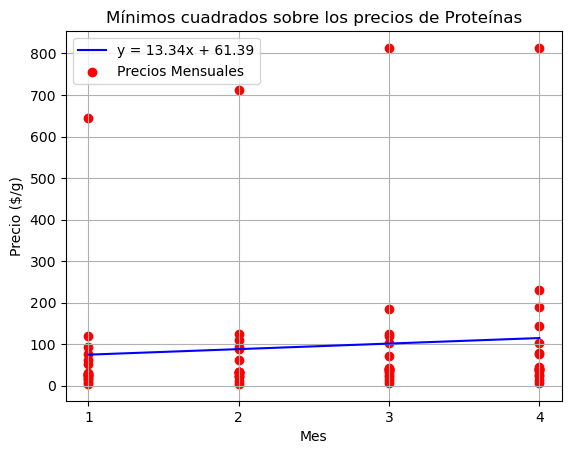

In [37]:
# lista de precios de todos los meses para graficar en el scatter
y_total_PRO = np.concatenate((tabla_PRO['Dic.'].values, tabla_PRO['Enero'].values, tabla_PRO['Feb.'].values, tabla_PRO['Marzo'].values))

# Graficar la recta HC
plt.plot(x_PRO, y_PRO, label=f'y = {m_PRO:.2f}x + {b_PRO:.2f}', color='blue')

# Graficar el scatter
plt.scatter(x_PRO, y_total_PRO, color='red', label='Precios Mensuales')

plt.xlabel('Mes')
plt.ylabel('Precio ($/g)')
plt.title('Mínimos cuadrados sobre los precios de Proteínas')
plt.xticks([1,2,3,4])

plt.legend()

plt.grid(True)
plt.show()

#### Mínimos Cuadrados sobre los precios de Grasas (meses: Diciembre, Enero, Febrero, Marzo)

In [38]:
# Filtrar la tabla resultante teniendo solamente los precios, el alimento y la cantidad de Grasas por gramo de alimento
tabla_GRA = tabla_resultante.drop(columns = ['HC (gr)', 'Proteinas (gr)'])

# Eliminar los alimentos que no tienen Grasas
# Identificar el índice de la fila que contiene 0 como valor de Grasas
indice_A_eliminar = tabla_GRA[tabla_GRA['Grasas (gr)'] == 0].index

# Eliminar la fila utilizando el índice obtenido
tabla_GRA = tabla_GRA.drop(indice_A_eliminar)

# Eliminar el mes Abril
tabla_GRA = tabla_GRA.drop(columns = 'Abril')

# Multiplicar cada fila por su valor 
# Lista de valores de Proteina
valores_GRA = tabla_GRA['Grasas (gr)']

# Multiplicar a cada precio por mes el factor "X = 1 / (cantidad de gr del nutriente cada 1 gr de alimento)", (Esto sale de hacer una regla de 3 simple)
tabla_GRA['Dic.'] = tabla_GRA['Dic.'] * (1/valores_GRA)
tabla_GRA['Enero'] = tabla_GRA['Enero'] * (1/valores_GRA)
tabla_GRA['Feb.'] = tabla_GRA['Feb.'] * (1/valores_GRA)
tabla_GRA['Marzo'] = tabla_GRA['Marzo'] * (1/valores_GRA)

# Eliminar columna de grasas (porque el valor es siempre 1 gr)
tabla_GRA = tabla_GRA.drop(columns = "Grasas (gr)")

tabla_GRA

,Dic.,Enero,Feb.,Marzo,Alimento
0,1.666667,2.066667,2.300000,2.400000,Aceite girasol
3,203.636364,253.272727,273.636364,280.000000,Fideos secos
4,35.330579,46.487603,50.206612,55.785124,Harina trigo
5,25.867137,30.570253,35.273369,39.976484,Huevo
7,4.432234,4.875458,6.527473,7.615385,Leche entera en polvo
16,439.166667,510.000000,587.916667,602.083333,Bola de Lomo
17,36.000000,42.000000,50.000000,50.666667,Asado
18,104.000000,124.000000,142.000000,156.000000,Paleta cocida
19,42.000000,48.000000,52.000000,52.000000,Carne picada


**Aplicar Mínimos Cuadrados Grasas**

In [39]:
# coeficientes c del sistema (A^t.A).c = (A^t.y)
c_GRA = minimosCuadrados(tabla_GRA)

# valores "x" para la recta y = m.x + b
x_GRA = np.concatenate([
        np.full(len(tabla_GRA['Dic.']), 1),   # Todos los elementos son 1 (para diciembre)
        np.full(len(tabla_GRA['Enero']), 2),   # Todos los elementos son 2 (para enero)
        np.full(len(tabla_GRA['Feb.']), 3),   # Todos los elementos son 3 (para febrero)
        np.full(len(tabla_GRA['Marzo']), 4)    # Todos los elementos son 4 (para marzo)
])

# recta generada por mínimos cuadrados y = m.x + b
b_GRA = c_GRA[0] # ordenada al origen
m_GRA = c_GRA[1] # pendiente
y_GRA = m_GRA * x_GRA + b_GRA

**Gráfico Grasas**

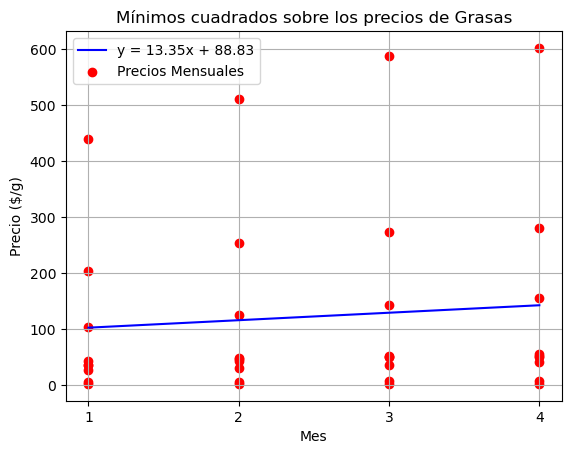

In [40]:
# lista de precios de todos los meses para graficar en el scatter
y_total_GRA = np.concatenate((tabla_GRA['Dic.'].values, tabla_GRA['Enero'].values, tabla_GRA['Feb.'].values, tabla_GRA['Marzo'].values))

# Graficar la recta HC
plt.plot(x_GRA, y_GRA, label=f'y = {m_GRA:.2f}x + {b_GRA:.2f}', color='blue')

# Graficar el scatter
plt.scatter(x_GRA, y_total_GRA, color='red', label='Precios Mensuales')

plt.xlabel('Mes')
plt.ylabel('Precio ($/g)')
plt.title('Mínimos cuadrados sobre los precios de Grasas')
plt.xticks([1,2,3,4])

plt.legend()

plt.grid(True)
plt.show()

#### Tabla de aumentos

Los aumentos promedios están dados por la pendiente del ajuste de mínimos cuadrados que se hizo al promedio de aumentos de los 4 meses (diciembre 2023, enero, febrero y marzo 2024). Como nos piden el aumento total en 4 meses, a cada pendiente hay que multiplicar por 4, ya que son 4 meses.

In [41]:
# Crear tabla
tabla_aumentos = {
    'Nutriente': ['HC', 'Proteinas', 'Grasas'], 
    'Aumento total en 4 meses ($/g)': [m_HC*4, m_PRO*4, m_GRA*4] # multiplicar por 4 así da el total de los 4 meses
}

# Convertirla a dataframe
df_tabla_aumentos = pd.DataFrame(tabla_aumentos)

# Imprimir
df_tabla_aumentos

,Nutriente,Aumento total en 4 meses ($/g)
0,HC,11.116270
1,Proteinas,53.343296
2,Grasas,53.416436


Esto indica que los carbohidratos aumentaron 11.116270 pesos por gramo, las proteínas 53.343296 pesos por gramo y las grasas 53.416436 pesos por gramo. Haciendo una regla de 3, para cada nutriente podremos ver cuánto es el aumento porcentual de diciembre hasta marzo. 

$Fórmula:$ $\frac {\text {aumento total}}{\text {precio inicial promedio}} \cdot 100$ 

$Grasas:$ $\frac {53,416436}{99.12218344} \cdot 100 = 53.89$ %

$Proteínas:$ $\frac {53,343296}{75,26186335687808} \cdot 100 = 70,877$ % 

$HC:$ $\frac {11,11627}{12,326041580184993} \cdot 100 = 90,18523853$ % 

Las proteínas con las grasas tuvieron un aumento total en 4 meses similar, pero como el precio promedio inicial de la carne era menor, su porcentaje de aumento es mayor significativamente. Lo mismo pasa con los HC, tienen un valor chico si lo comparamos con las proteinas y grasas (aumento total en 4 meses), pero en el aumento porcentual aumentaron casi el doble (aprox. 100%) debido a que su precio inicial promedio era bajo. 

Con estos resultados, se podría decir que los alimentos que contienen valores altos de HC, son los que más van aumentar su precio en estos 4 meses. Por ejemplo: las pastas y panes.

### Consigna 6 - Comparar el aumento de la carne en comparación con los otros rubros. Si la gente consume ese porcentaje menos de carne, como queda la ingesta individual con respecto a la tabla de metas de la OMS?

Primero vamos a identificar a las carnes en la tabla consumidores libres

$Carnes:$ Asado, Bola de Lomo, Carne picada y Paleta cocida

In [42]:
# Generar tabla de carnes de precios por gr
carnes = ['Bola de Lomo','Asado','Paleta cocida','Carne picada']
tabla_carnes = tabla_consumidores_libres[tabla_consumidores_libres['Alimento'].apply(lambda x: x in carnes)]

# Generar tabla "otros rubros" de precios por gr
tabla_otros_rubros = tabla_consumidores_libres[tabla_consumidores_libres['Alimento'].apply(lambda x: x not in carnes)]
tabla_carnes

,Dic.,Enero,Feb.,Marzo,Abril,Alimento
17,6.2,7.2,8.3,8.5,8.65,Bola de Lomo
18,5.4,6.3,7.5,7.6,7.75,Asado
19,5.2,6.2,7.1,7.8,7.90,Paleta cocida
20,4.2,4.8,5.2,5.2,5.50,Carne picada


**Mínimos cuadrados en carnes**

In [43]:
# Coeficientes c del sistema (A^t.A).c = (A^t.y)
c_carnes = minimosCuadrados(tabla_carnes)

# Recta generada por mínimos cuadrados y = m.x = b
b_carnes = c_carnes[0] # ordenada al origen

m_carnes = c_carnes[1] # pendiente de la recta

x_carnes = np.concatenate([
        np.full(len(tabla_carnes['Dic.']), 1),   # Todos los elementos son 1 (para diciembre)
        np.full(len(tabla_carnes['Enero']), 2),   # Todos los elementos son 2 (para enero)
        np.full(len(tabla_carnes['Feb.']), 3),   # Todos los elementos son 3 (para febrero)
        np.full(len(tabla_carnes['Marzo']), 4)    # Todos los elementos son 4 (para marzo)
])

y_carnes = m_carnes * x_carnes + b_carnes # y = m.x + b

**Mínimos cuadrados en "otros rubros"**

In [44]:
# Coeficientes c del sistema (A^t.A).c = (A^t.y)
c_otros = minimosCuadrados(tabla_otros_rubros)

# Recta generada por mínimos cuadrados y = m.x = b
b_otros = c_otros[0] # ordenada al origen

m_otros = c_otros[1] # pendiente de la recta

x_otros = np.concatenate([
        np.full(len(tabla_otros_rubros['Dic.']), 1),   # Todos los elementos son 1 (para diciembre)
        np.full(len(tabla_otros_rubros['Enero']), 2),   # Todos los elementos son 2 (para enero)
        np.full(len(tabla_otros_rubros['Feb.']), 3),   # Todos los elementos son 3 (para febrero)
        np.full(len(tabla_otros_rubros['Marzo']), 4)    # Todos los elementos son 4 (para marzo)
])

y_otros = m_otros * x_otros + b_otros # y = m.x + b

**Gráfico comparativo del aumento de las carnes con los otros rubros**

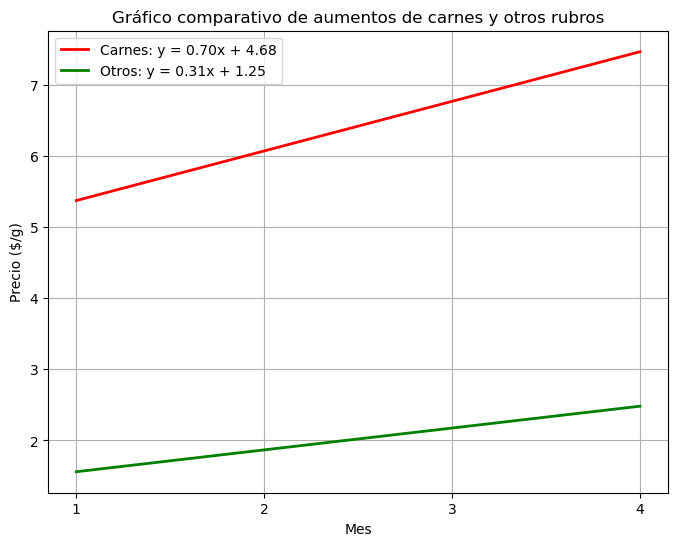

In [45]:
# Graficar las rectas de mínimos cuadrados
plt.figure(figsize=(8, 6))

# Graficar la recta de mínimos cuadrados de precios de la carne
plt.plot(x_carnes, y_carnes, color='red', linestyle='-', linewidth=2, label=f'Carnes: y = {m_carnes:.2f}x + {b_carnes:.2f}')

# Graficar la recta de mínimos cuadrados de precios de los otros rubros
plt.plot(x_otros, y_otros, color='green', linestyle='-', linewidth=2, label=f'Otros: y = {m_otros:.2f}x + {b_otros:.2f}')

# Personalizar el gráfico
plt.xlabel('Mes')
plt.xticks([1,2,3,4]) # 1 
plt.ylabel('Precio ($/g)')
plt.title('Gráfico comparativo de aumentos de carnes y otros rubros')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

#### Cálculamos el aumento total en estos 4 meses el precio de las carnes.

$1.$ **Calcular la pendiente promedio:** Esto ya lo hicimos y nos dio 0,70. 

$2.$ **Multiplicar la pendiente promedio por el número de meses:** Para obtener el aumento total en el periodo de 4 meses (de diciembre a abril), multiplicamos la pendiente por 4. 

**Aumento total:** $0,70 \cdot 4$ $=$ $2,8$

$3.$ **Calcular el porcentaje de aumento basado en el precio inicial promedio:** Primero, debemos encontrar el precio inicial de las carnes:

**Precio inicial promedio:** $\frac{6,2 + 5,4 + 5,2 + 4,2}{4}$ $=$ $5,25$

Luego, usamos el aumento total calculado y lo expresamos como un porcentaje del precio inicial promedio:

**Porcentaje de aumento:** $\frac{2,8}{5,25} \cdot 100$ $=$ $53$%

El aumento total de los precios de la carne es de aproximadamente $53$%.

#### Cálculamos el aumento total en estos 4 meses el precio de los otros rubros.

$1.$ **Calcular la pendiente promedio:** Esto ya lo hicimos y nos dio 0,31. 

$2.$ **Multiplicar la pendiente promedio por el número de meses:** Para obtener el aumento total en el periodo de 4 meses (de diciembre a abril), multiplicamos la pendiente por 4. 

**Aumento total:** $0,31 \cdot 4$ $=$ $1.24$

$3.$ **Calcular el porcentaje de aumento basado en el precio inicial promedio:** Primero, debemos encontrar el precio inicial de los otros rubros:

**Precio inicial promedio:** $\frac{1,67 + 1,65 + 1,99 + 3,2 + 0,95 + 3,05 + 1,65 + 1,1 + 2,8 + 0,82 + 1,2 + 0,5 + 0,85 + 0,5 + 0,92 + 1,9}{16}$ $=$ $1,54$

Luego, usamos el aumento total calculado y lo expresamos como un porcentaje del precio inicial promedio:

**Porcentaje de aumento:** $\frac{1,24}{1,54} \cdot 100$ $=$ $80$%

El aumento total de los precios de los otros rubros es de aproximadamente $80$%.

**Tabla comparativa de carnes y otros rubros**

In [46]:
# Calcular el aumento porcentual de los precios de las carnes
aumento_total_carne = m_carnes*4

precio_inicial_promedio_carne = sum(tabla_carnes['Dic.']) / 4 # ese 4 es por cantidad de valores

porcentaje_aumento_carne = (aumento_total_carne / precio_inicial_promedio_carne) * 100

# Calcular el aumento porcentual de los precios de los otros rubros
aumento_total_otros = m_otros*4

precio_inicial_promedio_otros = sum(tabla_otros_rubros['Dic.']) / 16 # ese 16 es por cantidad de valores

porcentaje_aumento_otros = (aumento_total_otros / precio_inicial_promedio_otros) * 100

In [47]:
# Crear tabla
tabla_aumentos_carnes_y_otros_rubros = {
    'Grupo': ['Carnes', 'Otros'], 
    'Aumento (%)': [porcentaje_aumento_carne, porcentaje_aumento_otros] 
}

# Convertirla a dataframe
df_tabla_aumentos_carnes_y_otros_rubros = pd.DataFrame(tabla_aumentos_carnes_y_otros_rubros)

# Imprimir
df_tabla_aumentos_carnes_y_otros_rubros

,Grupo,Aumento (%)
0,Carnes,53.142857
1,Otros,79.420030


El aumento total de los precios de los otro rubros en estos 4 meses fueron significativamente mayores al aumento del promedio de las carnes. Y es lógico, ya que en el punto donde evaluamos el aumento de los nutrientes, vimos que proteínas tuvieron un aumento de precios menor a que las grasas y similar a los carbohidratos. 

A pesar de que la carne no sea lo que más aumento, tuvo una suba de más del 50%. Esto quiere decir que el consumo de carne va a disminuir si comparamos diciembre 2023 a marzo 2024, ya que a la gente se la a dificultar cada vez más poder comprar carne. Es por esto, que luego se va a intentar lograr reemplazar esos valores nutricionales que aportan las carnes con alimentos de menor precio.

**Evaluamos la tabla de metas de la OMS cuando la gente consume el porcenaje de aumento menos**

Identificamos las carnes de la dieta y son: Asado, paleta, paleta cocida, hueso c/carne, carne picada, bola de lomo, hígado, pollo y pescado. Ahora, juntaremos todas las carnes y haremos un promedio para luego poder evaluar nuevamente en las metas propuestas por la OMS.

Tendremos una nueva dieta nutricional, la cual consiste en disminuir %18,5 el consumo de las carnes.

La nueva dieta tendrá un alimento llamado carnes, que contendrá el promedio de las carnes. Y a ese alimento se le disminuirá un 18,5% sus valores nutricionales.

In [48]:
# Lista de las carnes en la dieta
Carnes = ['Asado', 'Paleta ', 'Hueso c/carne', 'Carne picada', 'Bola de Lomo', 'Higado', 'pollo', 'pescado', 'Paleta cocida']

# Función para multiplicar la fila por su porcentaje si 'Alimento' está en la lista Carnes
def multiplicar_fila(row):
    if row['Alimento'] in Carnes:
        # Multiplicar todas las columnas menos 'Alimento'
        row[row.index != 'Alimento'] *= (1-(porcentaje_aumento_carne / 100))
    return row

# Aplicar la función a cada fila de la tabla nutriocional original
tabla_nutricional_nueva = data.apply(multiplicar_fila, axis=1)


**Evaluar la nueva dieta**

In [49]:
# Obtener una lista que contiene cada nutriente y si cumplió o no con las metas. Y obtener otra lista con los valores de cada nutriente
resultado_margenes , resultado_valores = evaluar_dieta(tabla_nutricional_nueva)

* Lista de evaluación de nutrientes en base a las metas dichas por la OMS

In [50]:
for factor, margen in resultado_margenes.items():
    print(f"{factor} = {margen}")

Grasas (gr) = False
HC (gr) = True
Proteinas (gr) = True
Na (gr) = False
Frutas y verduras = True
Fibra (gr) = False


* Lista de valores totales de los nutrientes

In [51]:
for factor, valor in resultado_valores.items():
    print(f"{factor} = {valor}")

Grasas (gr) = 67.82888571428572
HC (gr) = 409.9002
Proteinas (gr) = 88.41900000000001
Na (gr) = 3.2511283428571427
Frutas y verduras = 650.0
Fibra (gr) = 21.26


Ahora los valores nuevos pasan a ser:

$Grasas:$ su valor es de 10,5% de la energía total cuando en verdad debería estar entre 15-30%

$HC:$ su valor es de 63% de la energía total y el rango de la OMS es de 55-75%

$Proteínas:$ su valor es de 13,6% de la energía total y el rango de la OMS es de 10-15%

$Sodio:$ su valor es de 3,25 g/día cuando en verdad debería estar en 0,2 gr/día

$Fibra:$ su valor es de 21,26 g/día cuando en verdad debería ser >25 g/día

$\text {Frutas y verduras}:$ su valor es 650 g/día y el rango OMS es >=400g/día

Ahora las proteínas si cumplen con la meta porque antes se pasaban 1,5% del rango y como disminuyó era lógico que podía pasar. En cuánto a los valores totales de los nutrientes, pudimos observar que solamente las proteínas tuvieron cambios significativos. Las grasas, que suelen tener las carnes, siguen estando en rango a pesar de la disminución de su consumo.

## Reemplazo dietario

### Consigna 7 - Proponer dos alimentos de la tabla 3 que lleguen a reemplazar la disminución del 18,5% de la carne sin perder valor nutricional. Corroborrar con la tabla de metas de la OMS la dieta diaria obtenida. Además, se pone como restricción en la elección, que el precio de los alimentos de reemplazo debe ser menor al 50% del aumento de la carne.

Para encontrar estos 2 alimentos de la tabla 3, lo que hicimos fue buscar 2 alimentos en el gráfico 3D del Análisis en componente principales que se encuentren cerca de las Carnes, ya que eso significa que tienen valores nutricionales parecidos.

Un alimento elegido fue la leche entera en polvo porque se encuentra cerca de la paleta cocida, y el otro alimento elegido fue el pan fránces que se encuentra cerca de la bola de lomo. Como sabemos que estos alimentos tienen valores altos de proteínas con respecto a los demás alimentos, es lógico elegirlos.

**Evaluar la dieta en las metas de la OMS**

Al disminuir un 18,5% el consumo de carne, la cantidad (gr/ml) total de la dieta pasa a ser menor. Lo que pensamos fue que esa cantidad (gr/ml) faltante de la nueva dieta, se rellene con cantidad (gr/ml) de huevo y leche entera en polvo para así llegar a la misma cantidad (gr/ml) que había en la dieta original.

In [52]:
# Calcular la cantidad (gr/ml) que se pierde
cantidad_perdida = sum(data['Cantidad (gr/ml)']) - sum(tabla_nutricional_nueva['Cantidad (gr/ml)'])
print("Cantidad (gr/ml) que se perdió:",cantidad_perdida)

Cantidad (gr/ml) que se perdió: 119.57142857142844


Agregamos 60 gr/ml de cada alimento. Pan fránces había 234 gr/ml y ahora habrá 294 gr/ml, eso significa que sus valores nutricionales aumentaron x1,25. Mientras que de leche entera en polvo había 11 gr/ml y ahora habrá 71 gr/ml, eso significa que sus valores nutricionales aumentaron x6,45.

Entonces tenemos que multiplicar la cantidad que aumentaron sus gr. a sus valores nutricionales en la última dieta calculada.

In [53]:
# Función para multiplicar la fila de la leche fluida entera y entera en polvo
def multiplicar_fila(row):
    if row['Alimento'] == 'Pan frances':
        row.iloc[1:] *= 1.25
    if row['Alimento'] == 'Leche entera en polvo':
        row.iloc[1:] *= 6.45
    return row

# Aplicar la función a cada fila de la tabla nutriocional nueva
tabla_nutricional_disminucion = tabla_nutricional_nueva.apply(multiplicar_fila, axis=1)

Evaluamos

In [54]:
# Obtener una lista que contiene cada nutriente y si cumplió o no con las metas. Y obtener otra lista con los valores de cada nutriente
resultado_margenes_disminucion , resultado_valores_disminucion = evaluar_dieta(tabla_nutricional_disminucion)

* Lista de evaluación de nutrientes en base a las metas dichas por la OMS

In [55]:
for factor, margen in resultado_margenes_disminucion.items():
    print(f"{factor} = {margen}")

Grasas (gr) = False
HC (gr) = True
Proteinas (gr) = True
Na (gr) = False
Frutas y verduras = True
Fibra (gr) = False


* Lista de valores totales de los nutrientes

In [56]:
for factor, valor in resultado_valores_disminucion.items():
    print(f"{factor} = {valor}")

Grasas (gr) = 82.70738571428572
HC (gr) = 434.4797
Proteinas (gr) = 103.897
Na (gr) = 3.493326342857143
Frutas y verduras = 650.0
Fibra (gr) = 21.26


$Grasas:$ su valor es de 11,75% de la energía total cuando en verdad debería estar entre 15-30%

$HC:$ su valor es de 62% de la energía total y el rango de la OMS es de 55-75%

$Proteínas:$ su valor es de 14,75% de la energía total y el rango de la OMS es de 10-15%

$Sodio:$ su valor es de 3,50 g/día cuando en verdad debería estar en 0,2 gr/día

$\text {Frutas y verduras}:$ su valor es 650 g/día y el rango OMS es >=400g/día

$Fibra:$ su valor es de 21,26 g/día cuando en verdad debería estar en >25 g/día

Conclusión, con la leche y el pán se podrá reemplazar los valores nutricionales pérdidos por la disminución del consumo de carne, pero siguen faltando las grasas para llegar a las metas y hay que tener cuidado ya que las proteínas están al borde de pasarse del rango.

### Consigna 8 - Proponer dos alimentos de la tabla 1 lejanos en el sentido de distancia Euclideana del espacio de generadores del ACP, que reemplacen la cantidad de proteína perdida. Se pueden usar todos los alimentos de la tabla 1. Corroborar como varían los objetivos ahora en la tabla de metas de la OMS en cada caso.

Inicialmente la dieta tenía en total 112,4 gr de proteínas y luego por la disminución de consumo de carne la proteína cayó a 88,42 gr. Entonces se perdió 24 gr.

Mirando el espacio de generadores del ACP de la tabla 1, elegimos al queso de rallar y queso crema que son los alimentos más lejanos a las carnes en su mismo cluster.

Como pasó en el punto 7), al disminuir el consumo de carne la cantidad (gr/ml) bajó 120 gr/ml. Entonces lo que haremos ahora es poner 60 gr/ml de cada alimento nuevo propuesto y verificar con la función evaluar dieta.

El queso crema y el queso de rallar anteriormente tenían 1,66 gr/ml y ahora pasarán a tener 61,66 gr/ml, es decir sus valores nutricionales aumentarán x37,15.

In [57]:
# Función para multiplicar la fila de la leche fluida entera y entera en polvo
def multiplicar_fila(row):
    if row['Alimento'] == 'Queso rallar':
        row.iloc[1:] *= 37.15
    if row['Alimento'] == 'Queso crema':
        row.iloc[1:] *= 37.15
    return row

# Aplicar la función a cada fila de la tabla nutriocional nueva
tabla_nutricional_dos_lejanos = data.apply(multiplicar_fila, axis=1)

Evaluamos

In [58]:
# Obtener una lista que contiene cada nutriente y si cumplió o no con las metas. Y obtener otra lista con los valores de cada nutriente
resultado_margenes_dos_lejanos , resultado_valores_dos_lejanos = evaluar_dieta(tabla_nutricional_dos_lejanos)

* Lista de evaluación de nutrientes en base a las metas dichas por la OMS

In [59]:
for factor, margen in resultado_margenes_dos_lejanos.items():
    print(f"{factor} = {margen}")

Grasas (gr) = False
HC (gr) = True
Proteinas (gr) = False
Na (gr) = False
Frutas y verduras = True
Fibra (gr) = False


* Lista de valores totales de los nutrientes

In [60]:
for factor, valor in resultado_valores_dos_lejanos.items():
    print(f"{factor} = {valor}")

Grasas (gr) = 106.554
HC (gr) = 414.57300000000004
Proteinas (gr) = 135.91049999999998
Na (gr) = 4.1203615
Frutas y verduras = 650.0
Fibra (gr) = 21.26


$Grasas:$ su valor es de 14,40% de la energía total cuando en verdad debería estar entre 15-30%

$HC:$ su valor es de 56% de la energía total y el rango de la OMS es de 55-75%

$Proteínas:$ su valor es de 14,75% de la energía total y el rango de la OMS es de 10-15%

$Sodio:$ su valor es de 4,12 g/día cuando en verdad debería estar en 0,2 gr/día

$\text {Frutas y verduras}:$ su valor es 650 g/día y el rango OMS es >=400g/día

$Fibra:$ su valor es de 21,26 g/día cuando en verdad debería estar en >25 g/día

La respuesta a la pregunta es sí, se puede reemplazar por otros alimentos para obtener la cantidad de proteína perdida. Pero hay que tener cuidado con los otros nutriente, por ejemplo, algo malo es que los carbohidratos pasan a estar en el límite del rango de la OMS, o también algo bueno es que las grasas se acercan al rango propuesto por la OMS.